<a href="https://colab.research.google.com/github/JJoaoV22/HousePrices_Kaggle/blob/main/HousePrices_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas e módulos


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import metrics

Importanto os datasets de treino e teste

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Scatter Plot para checar possíveis outliers

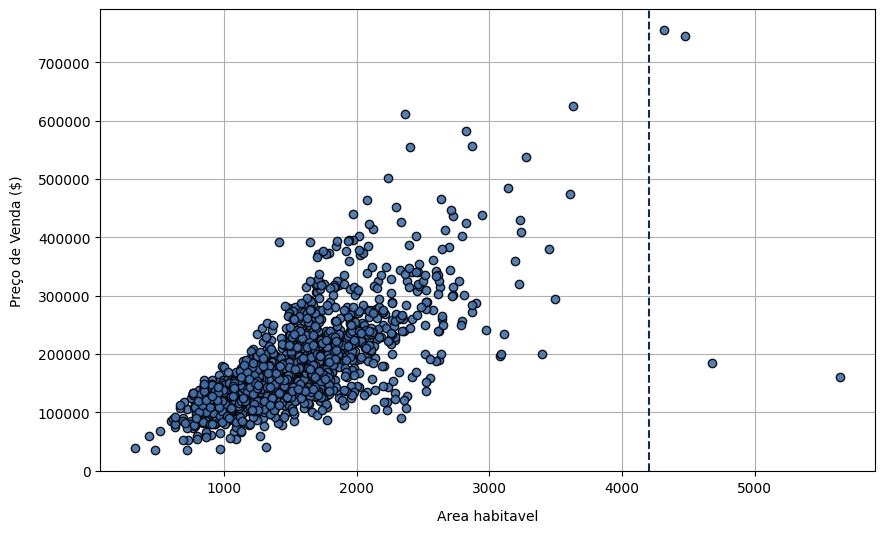

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(train["GrLivArea"], train["SalePrice"], c="#3f72af", zorder=3, alpha=0.9,edgecolors='black')
ax.axvline(4200, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Area habitavel", labelpad=10)
ax.set_ylabel("Preço de Venda ($)", labelpad=10)
plt.show()

Removendo outliers e unindo os datasets de treino e teste

In [4]:
train = train[train["GrLivArea"]<4200]
dados = pd.concat([train.drop("SalePrice",axis=1),test])

In [5]:
dados.shape

(2915, 80)

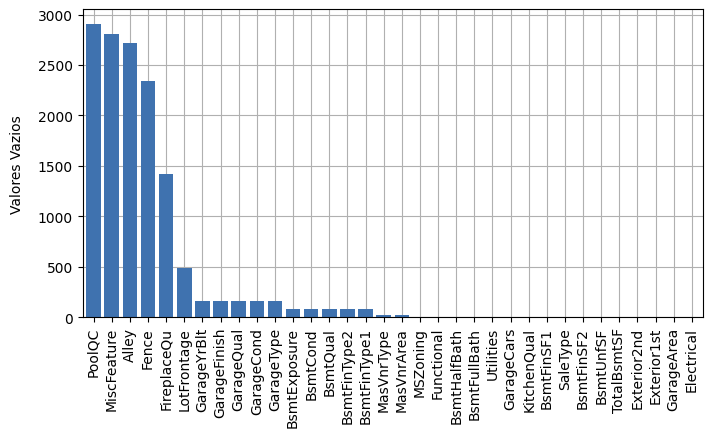

In [6]:
valores_vazios = dados.isnull().sum().sort_values(ascending=False)
valores_vazios = valores_vazios[valores_vazios > 0]
fig, ax = plt.subplots(figsize=(8, 4))
ax.grid()
ax.bar(valores_vazios.index, valores_vazios.values, zorder=2, color="#3f72af")
ax.set_ylabel("Valores Vazios", labelpad=10)
ax.set_xlim(-0.6, len(valores_vazios) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

Variáveis discretas numéricas

In [7]:
varaveis_numericas=[]
for feature in train:
    if train[feature].dtype!='O' and feature!= 'SalePrice':
        varaveis_numericas.append(feature)

variaveis_discretas=[]
for feature in varaveis_numericas:
    if len(train[feature].unique())<=25 and feature != 'SalePrice':
        variaveis_discretas.append(feature)

print(variaveis_discretas)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


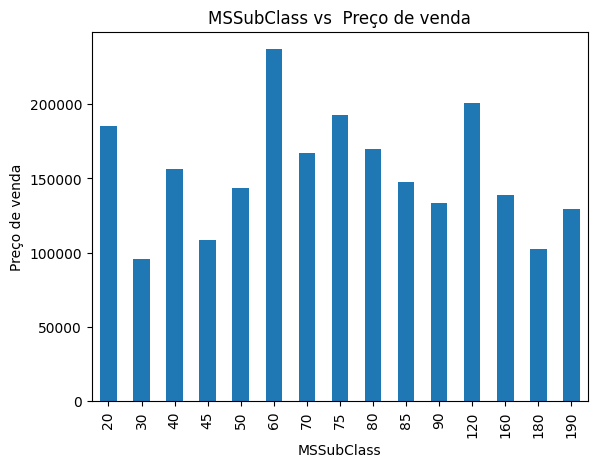

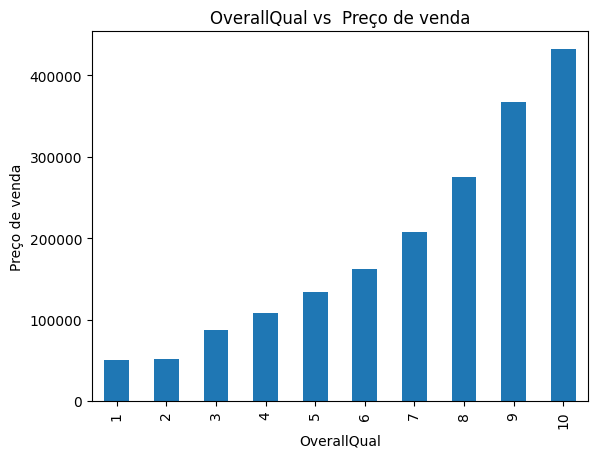

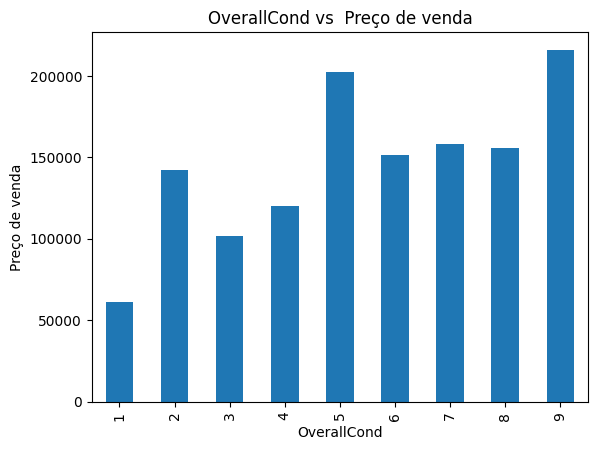

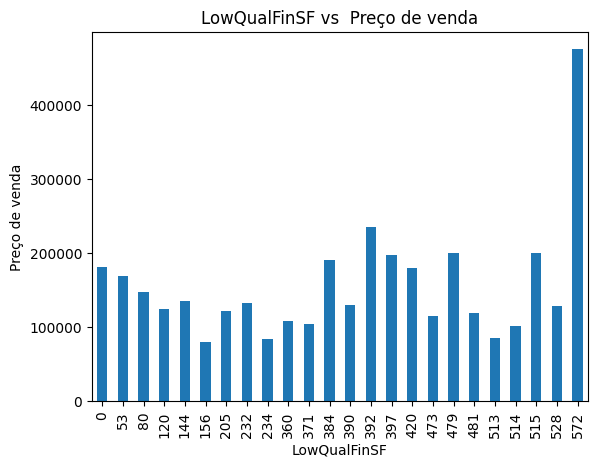

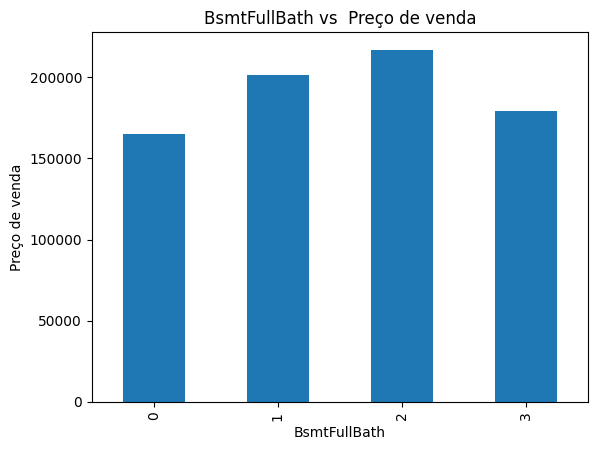

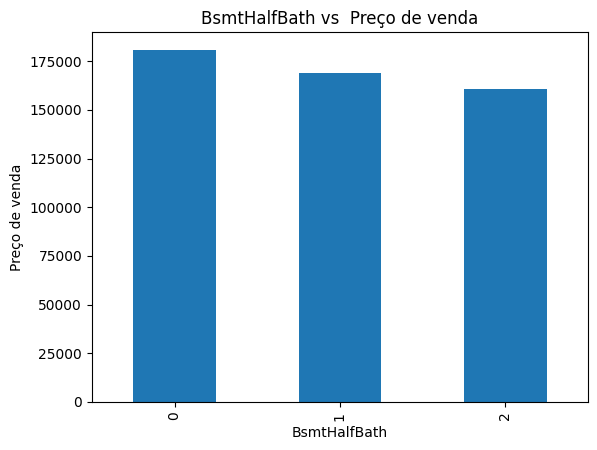

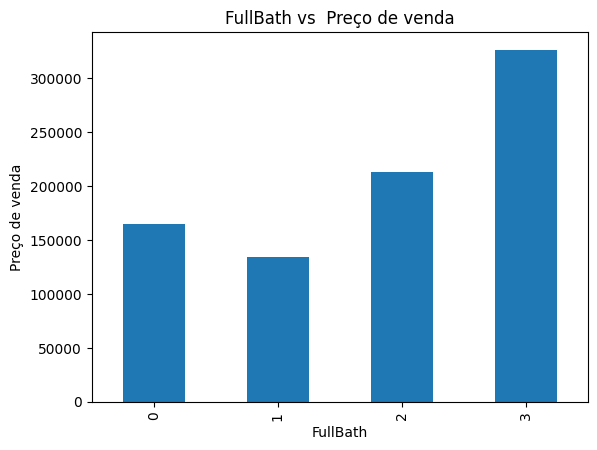

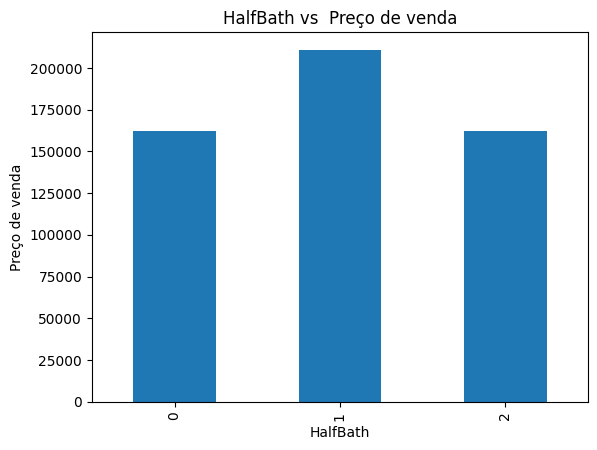

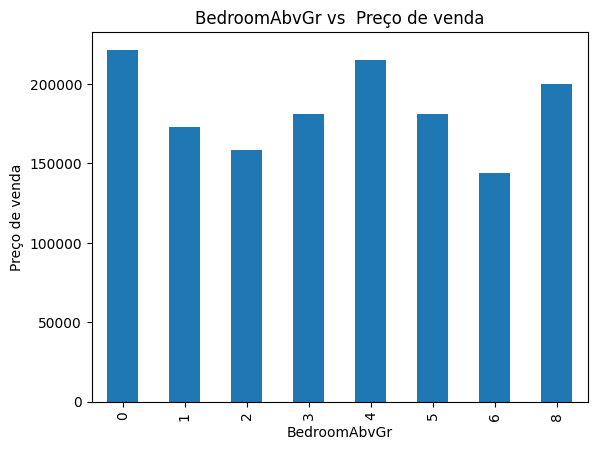

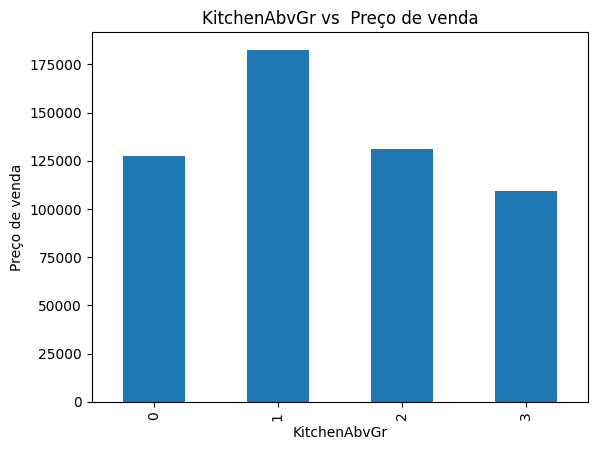

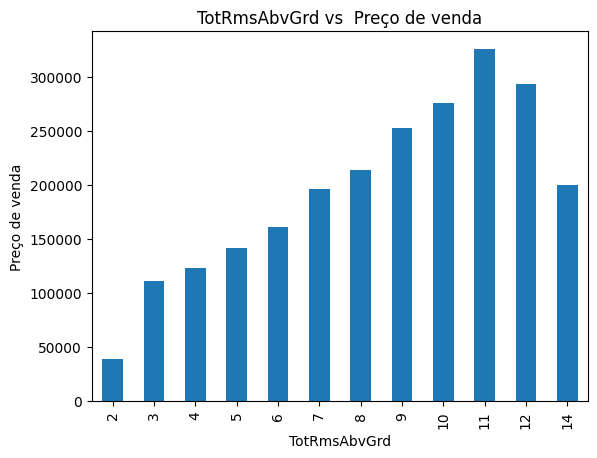

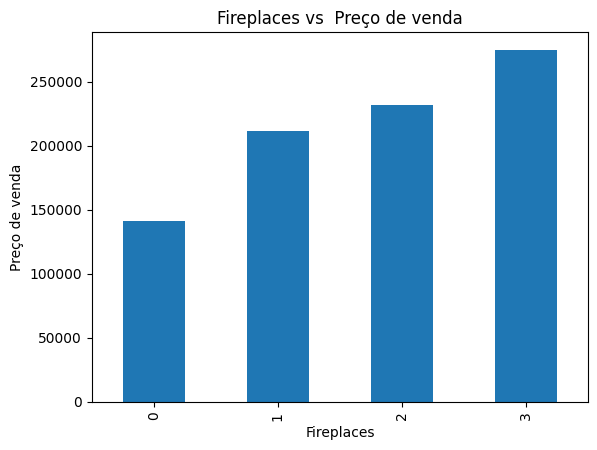

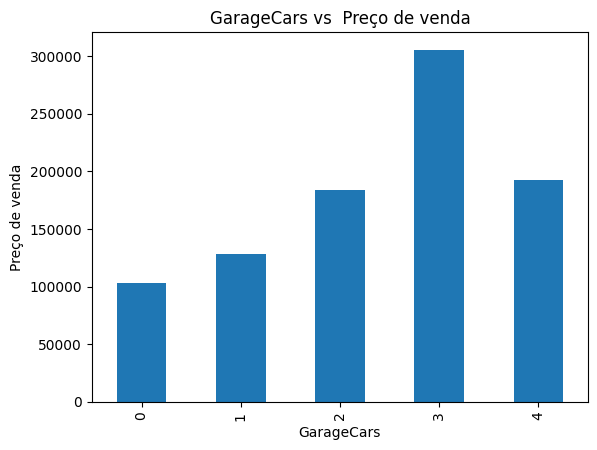

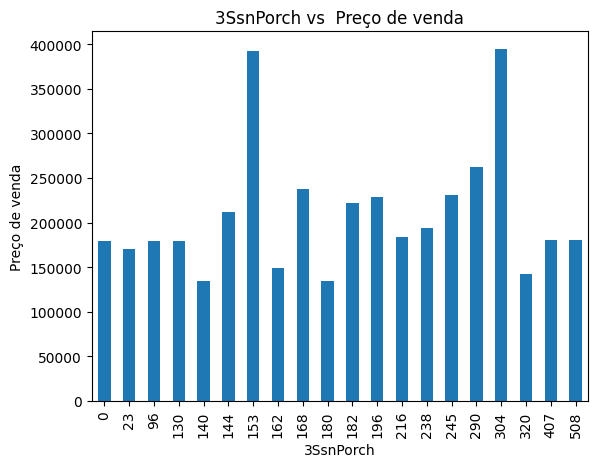

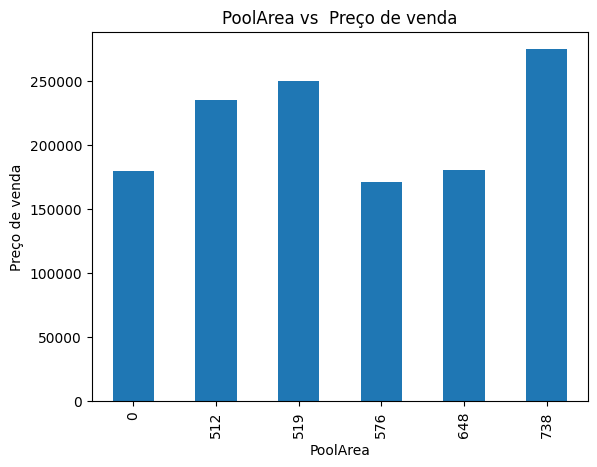

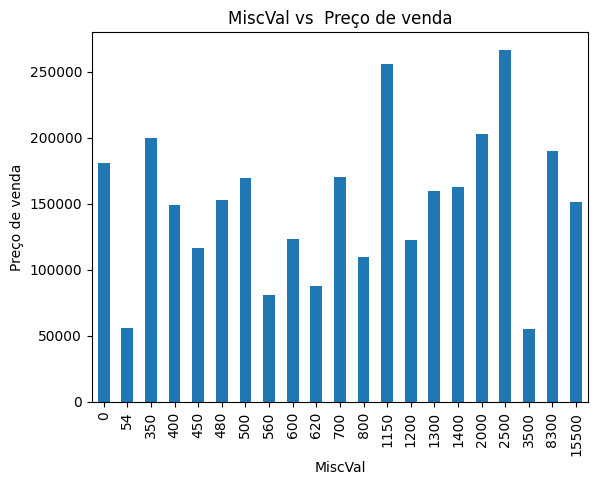

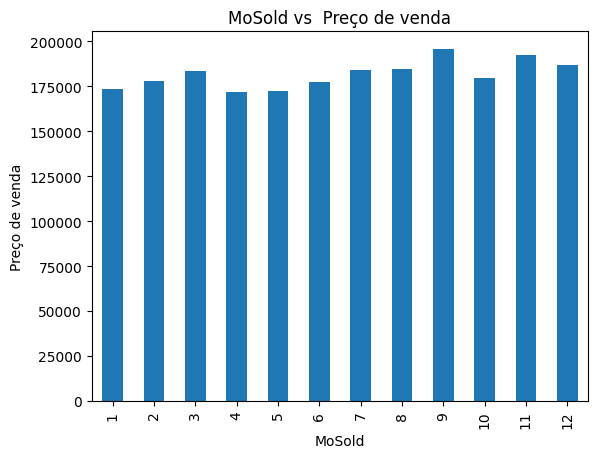

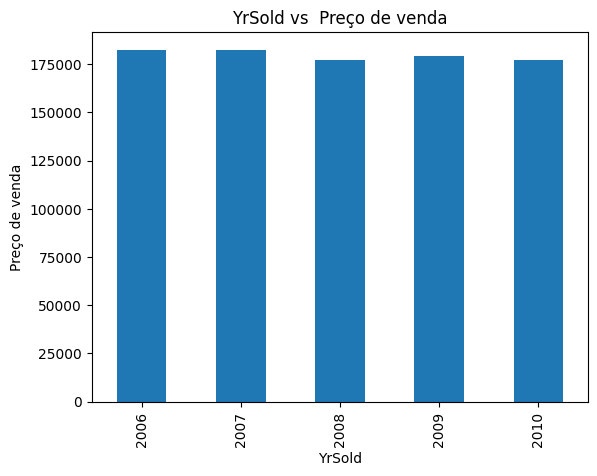

In [8]:
for feature in variaveis_discretas:
     train.groupby(feature)['SalePrice'].mean().plot.bar()
     plt.xlabel(feature)
     plt.ylabel('Preço de venda')
     plt.title(feature +' vs '+' Preço de venda')
     plt.show()

Variaveis numéricas continuas

In [9]:
variaveis_continuas=[]
for feature in varaveis_numericas:
    if feature not in variaveis_discretas and feature not in ["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold",'Id']:
        variaveis_continuas.append(feature)

print(variaveis_continuas)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


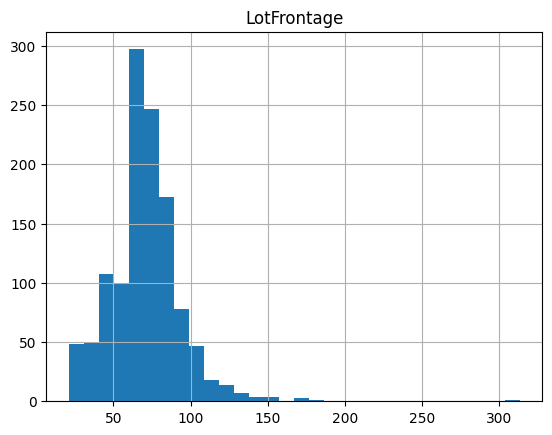

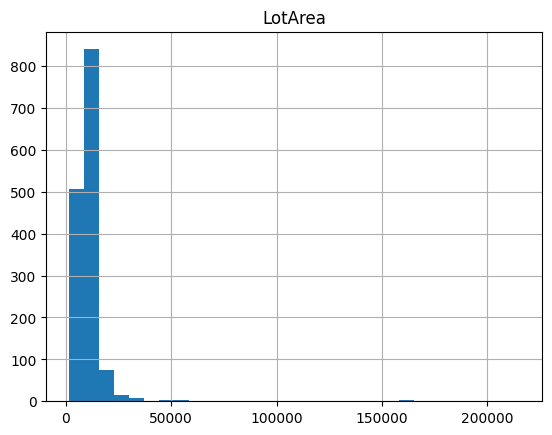

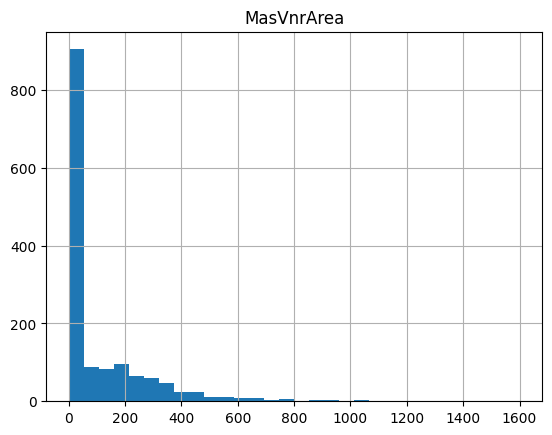

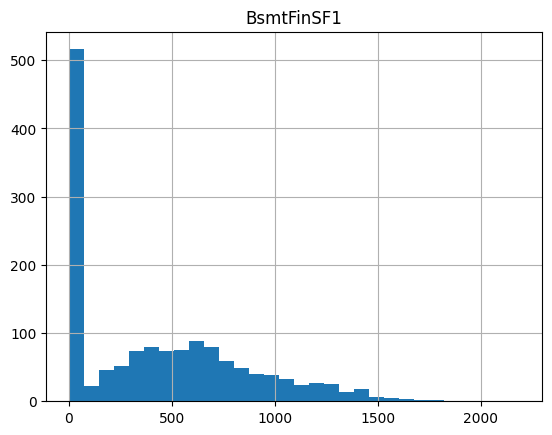

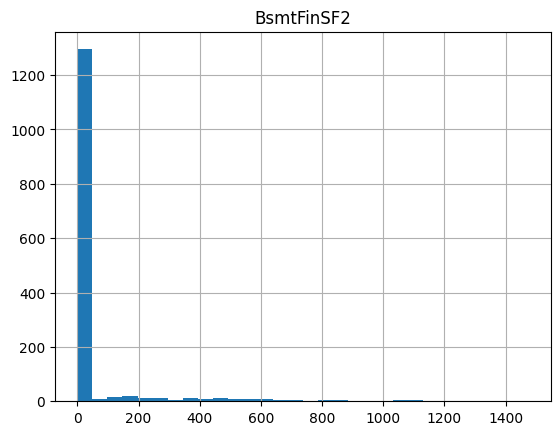

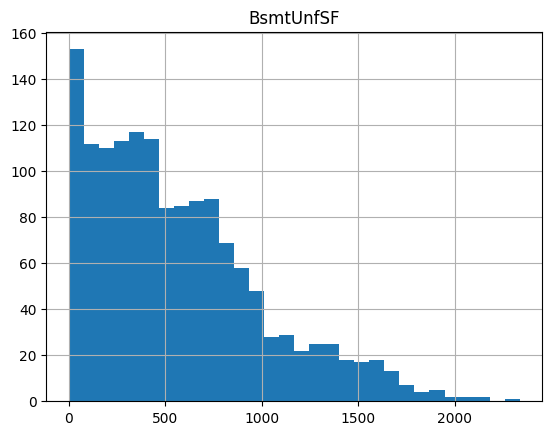

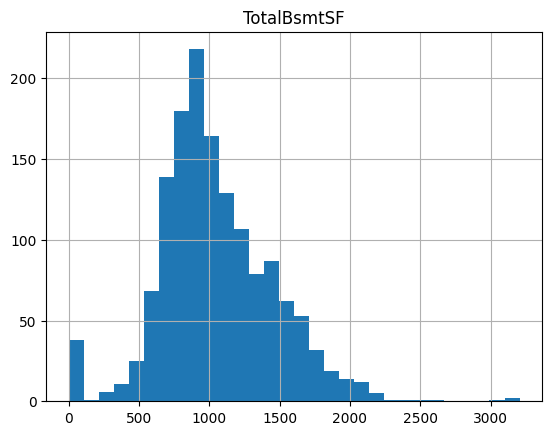

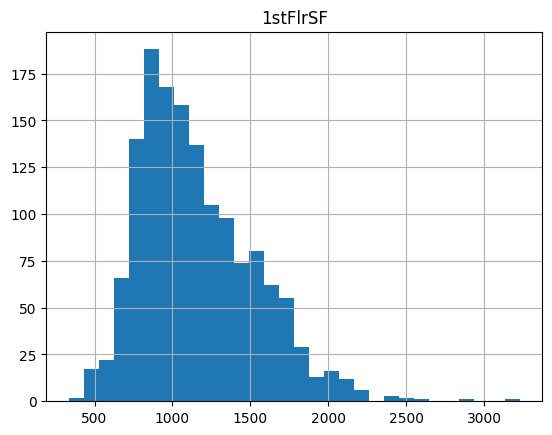

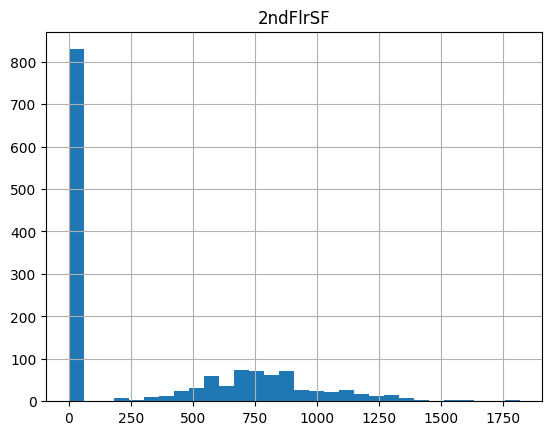

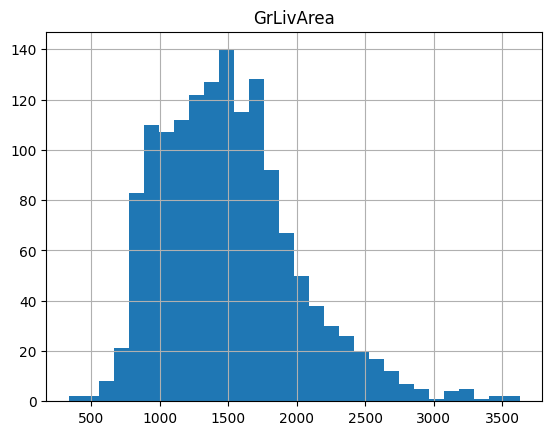

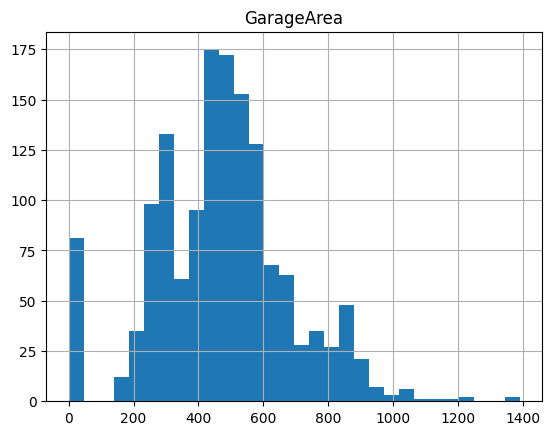

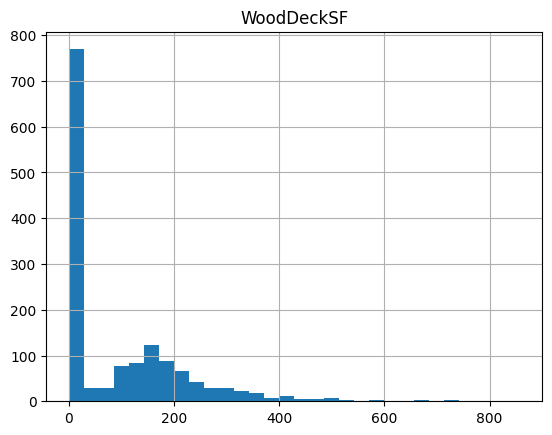

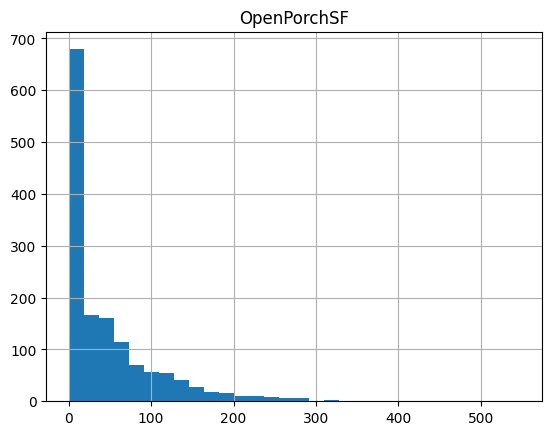

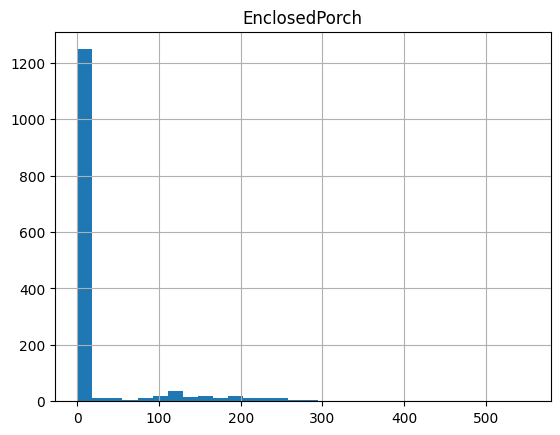

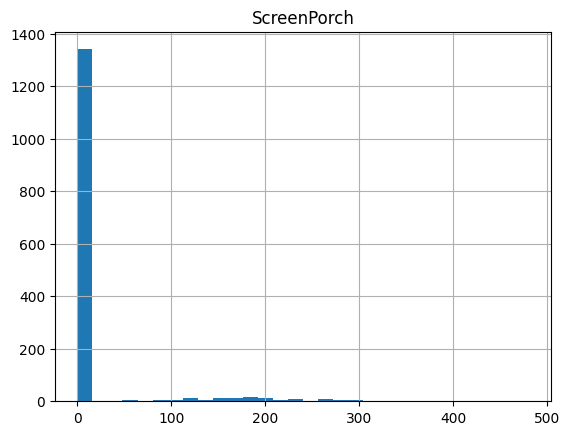

In [10]:
for feature in variaveis_continuas:
     train[feature].hist(bins=30)
     plt.title(feature)
     plt.show()

Variaveis categóricas

In [11]:
variaveis_categoricas=[]
for feature in train.columns:
    if train[feature].dtype=='O'and feature!= 'SalePrice':
        variaveis_categoricas.append(feature)
print(variaveis_categoricas)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


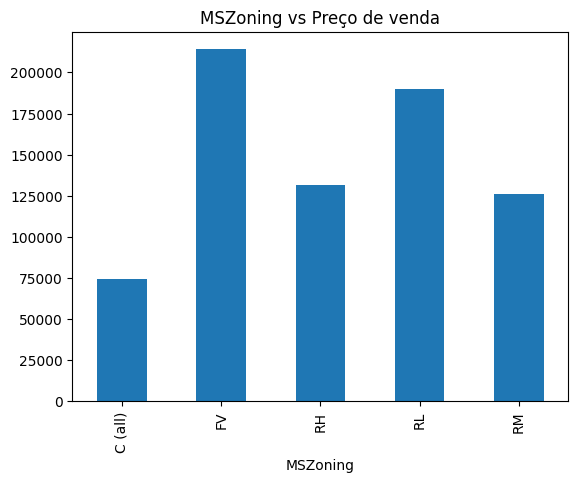

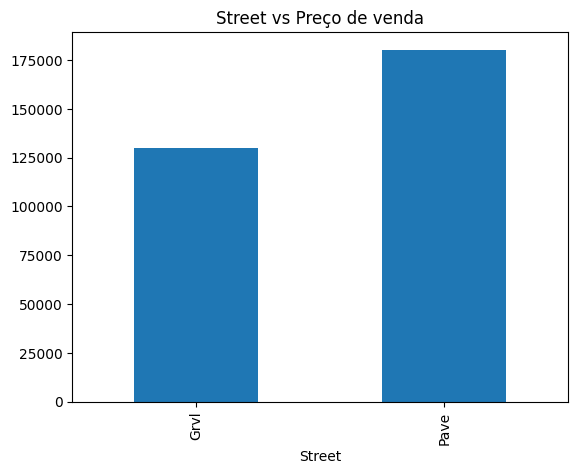

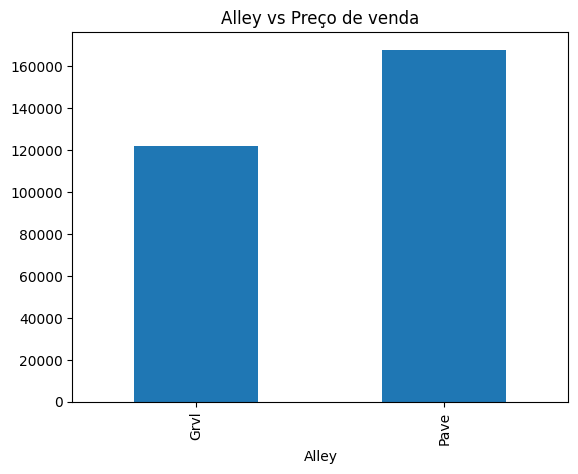

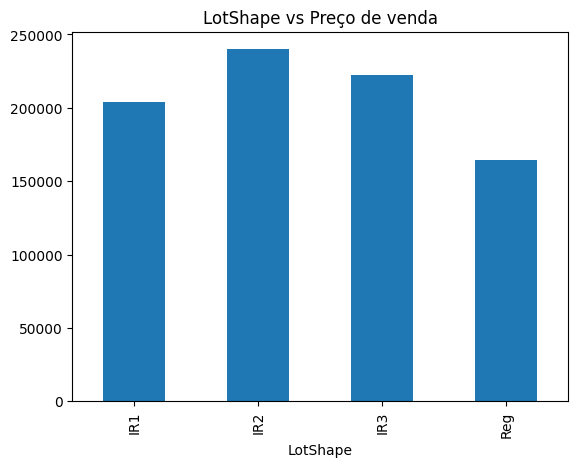

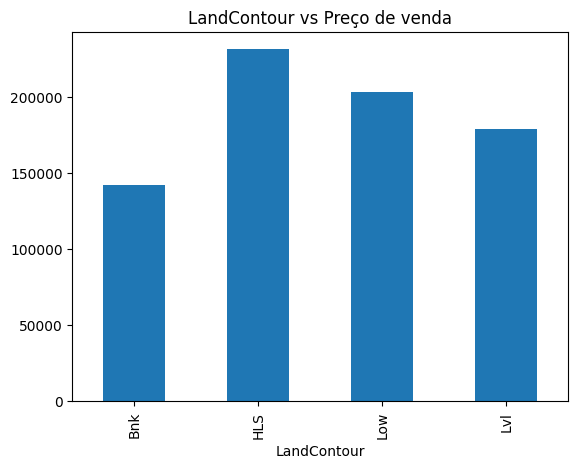

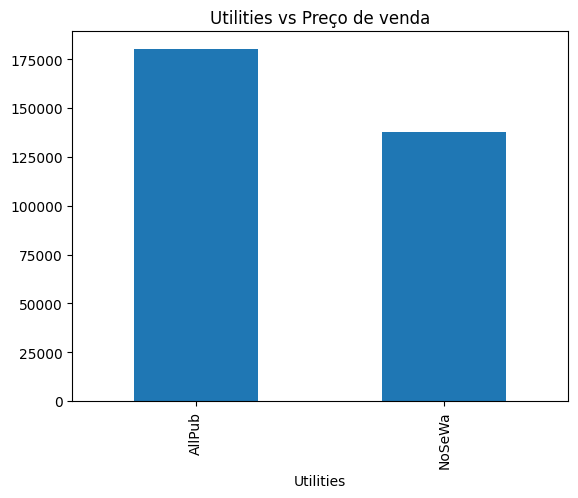

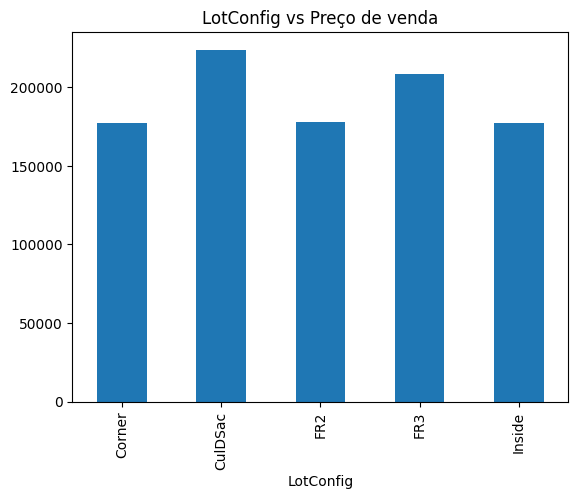

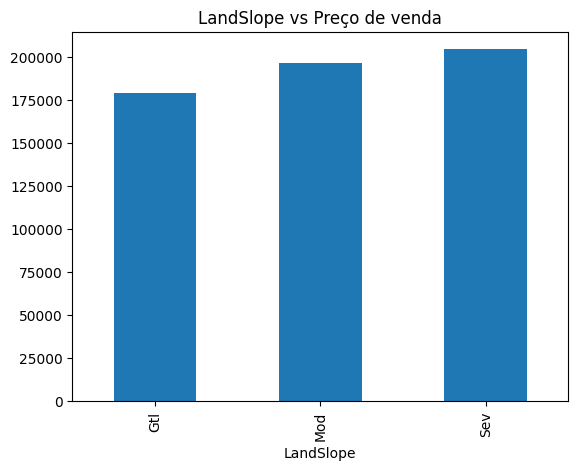

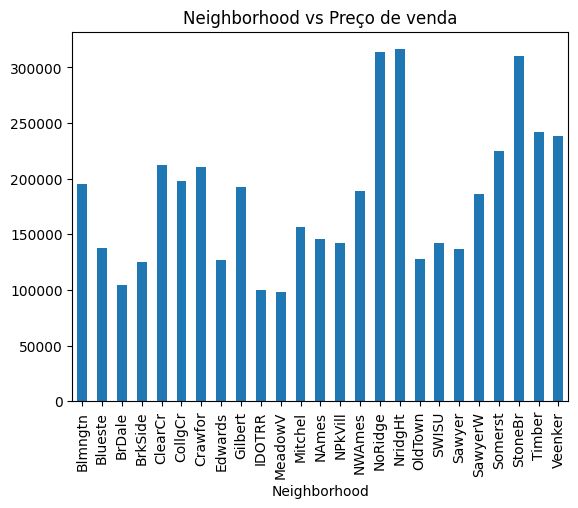

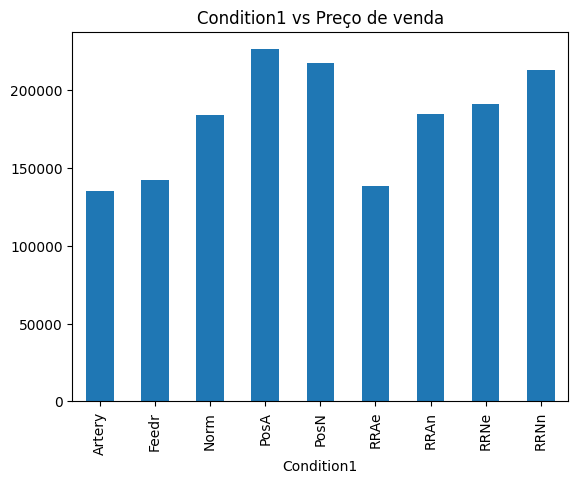

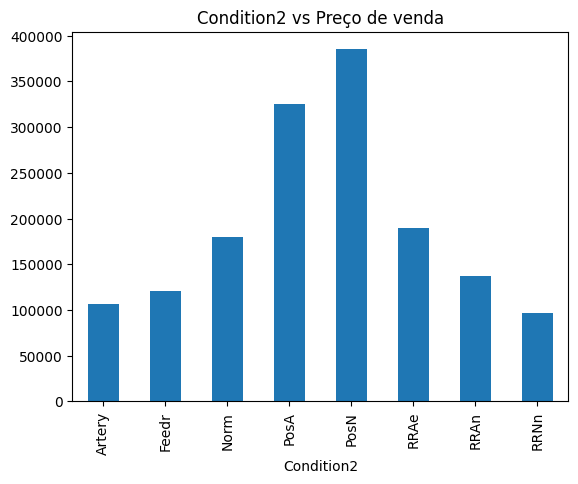

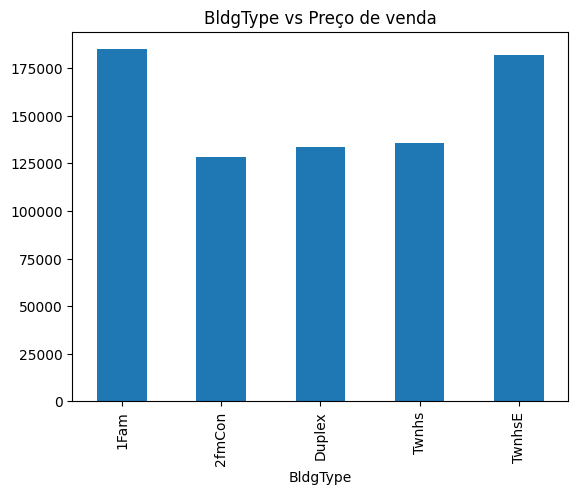

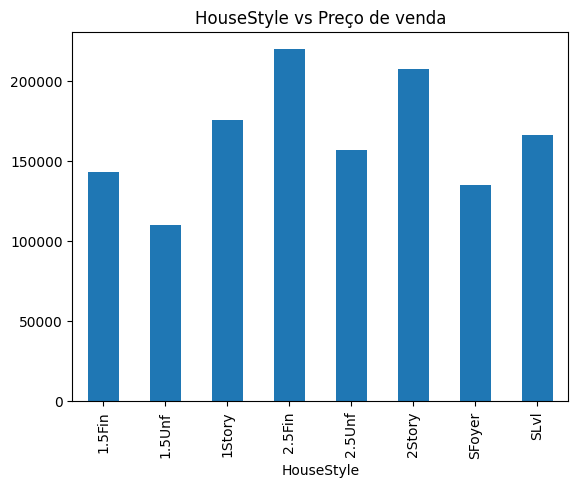

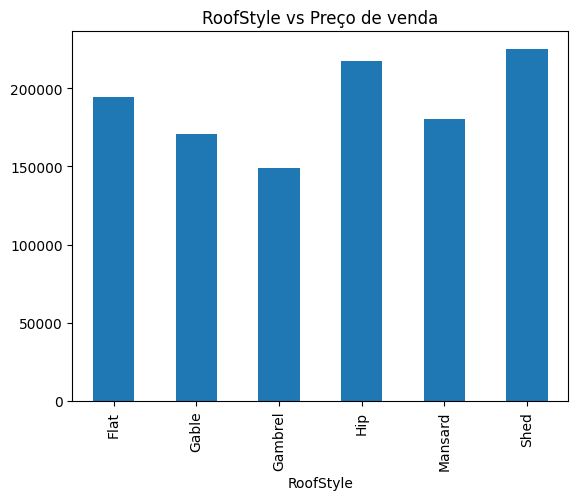

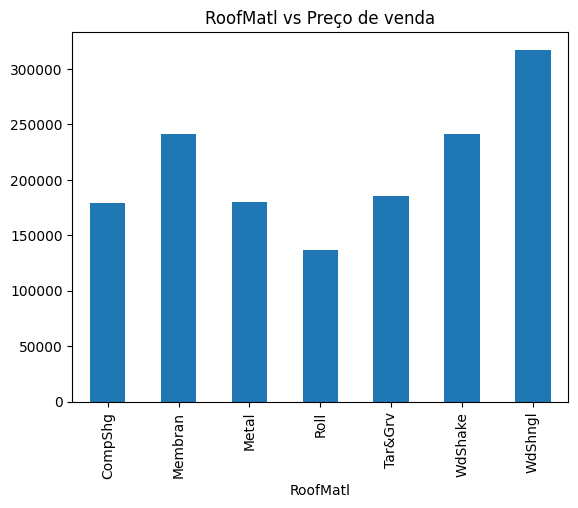

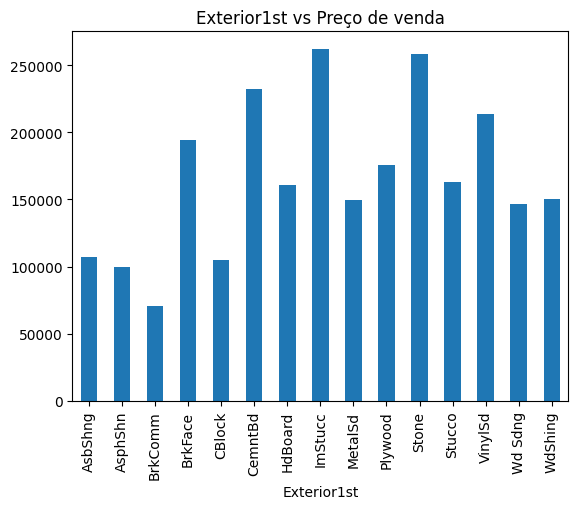

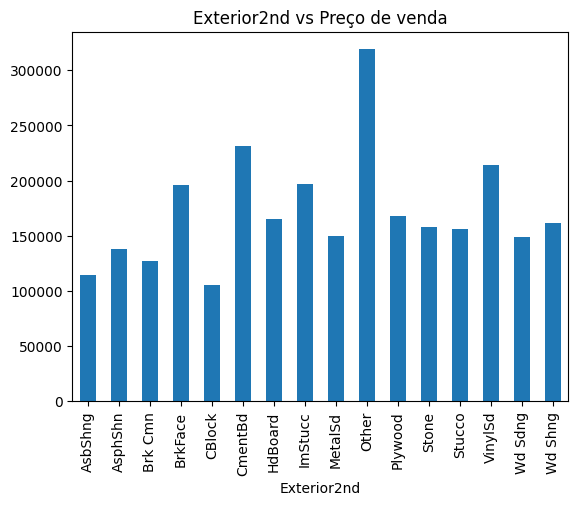

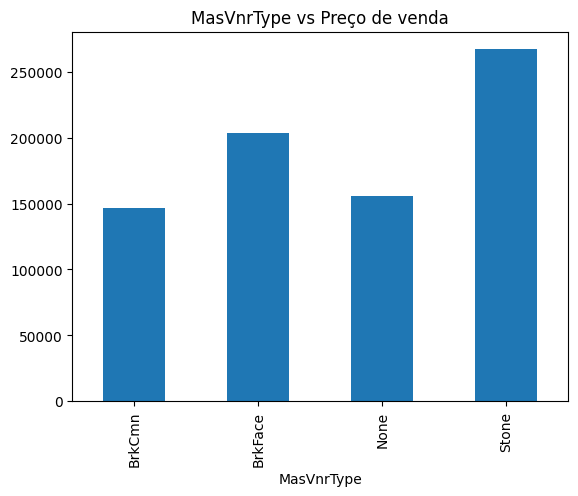

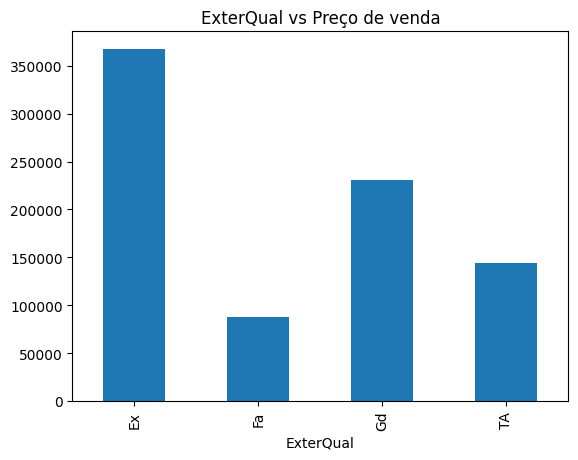

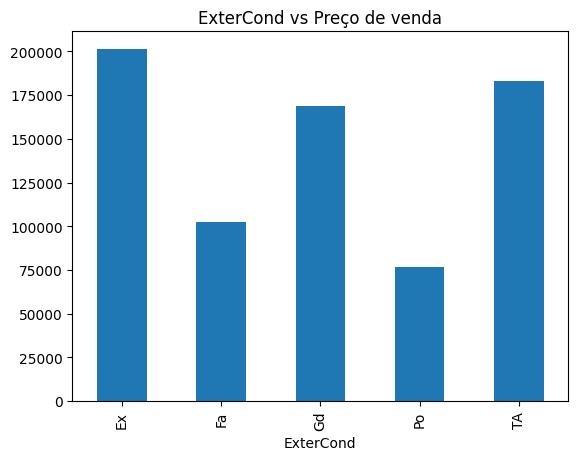

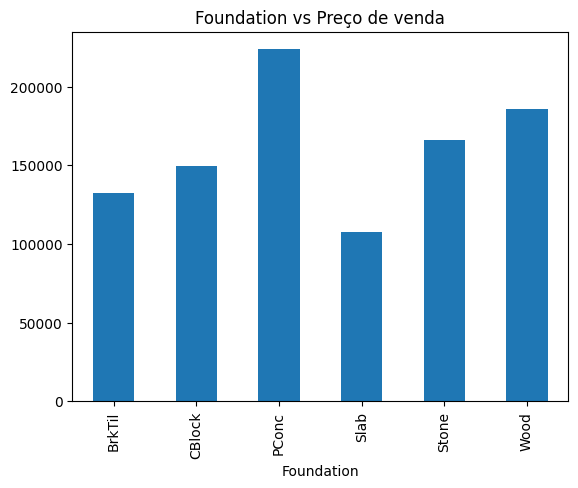

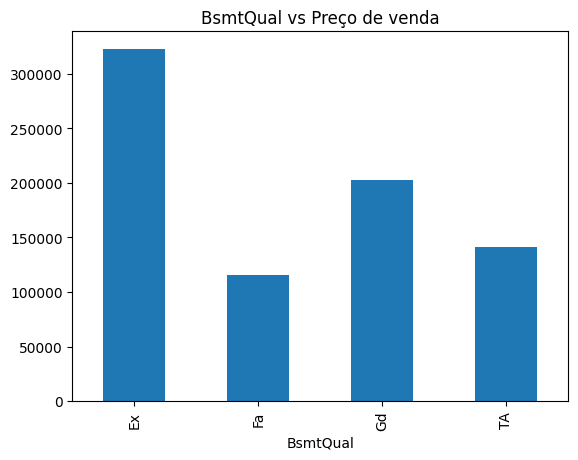

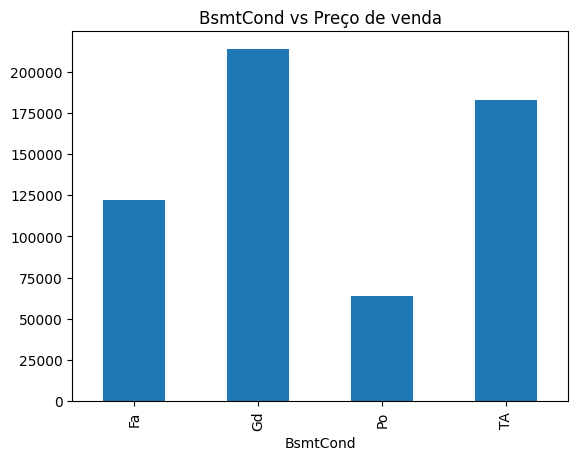

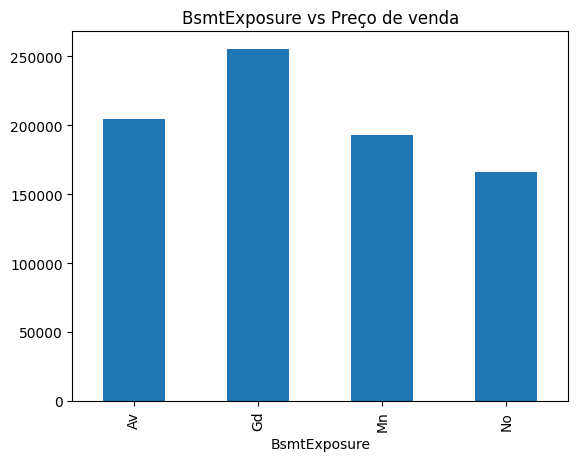

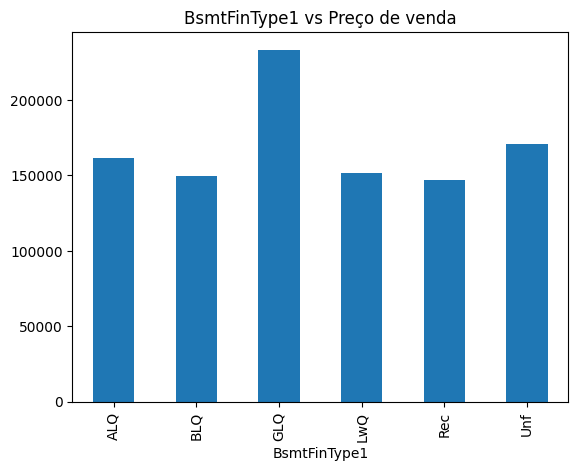

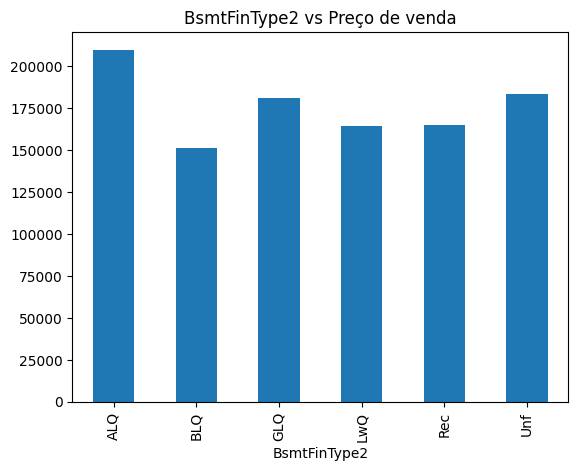

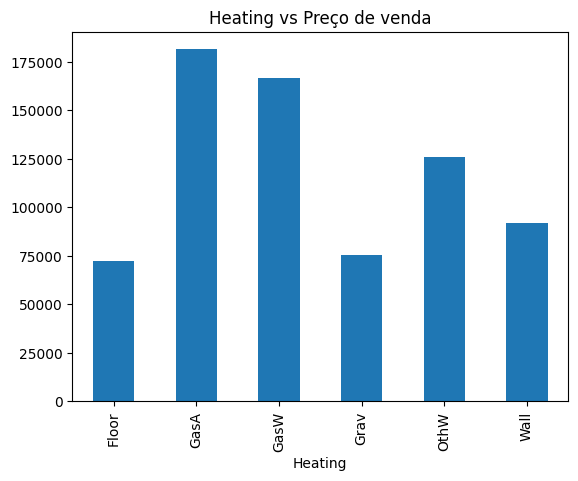

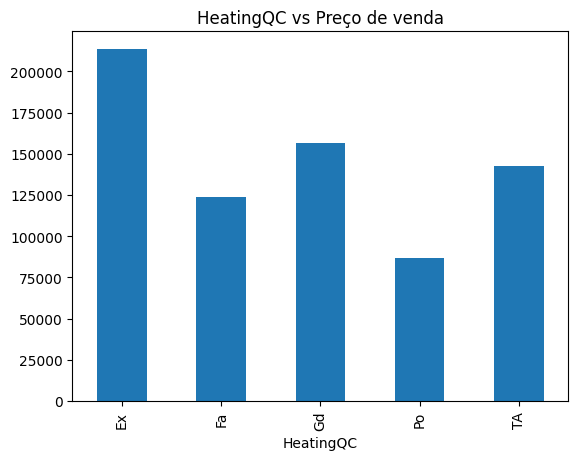

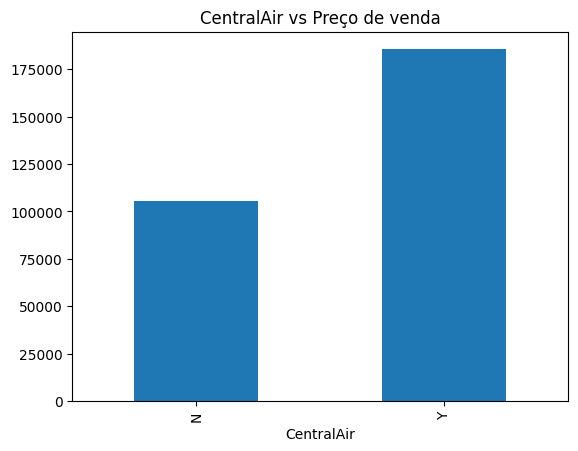

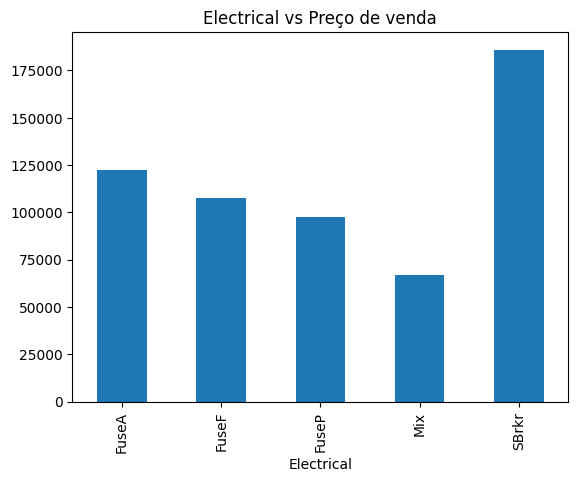

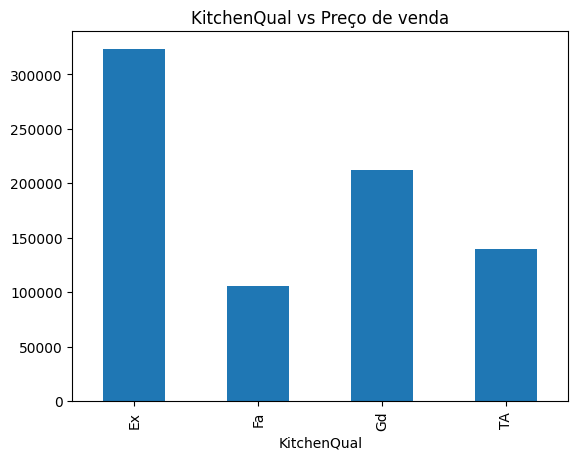

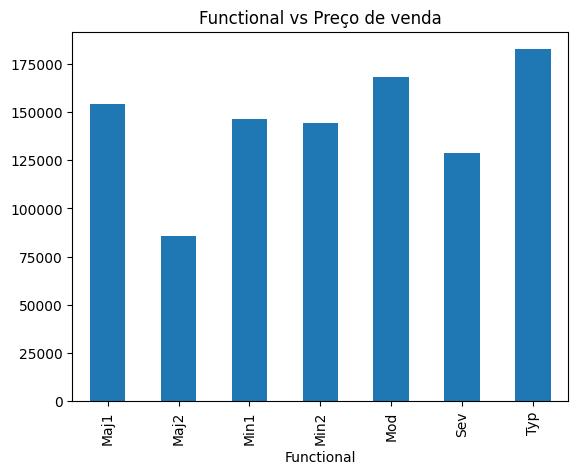

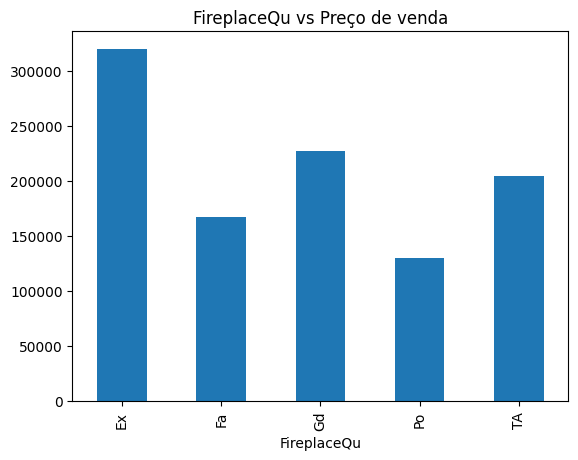

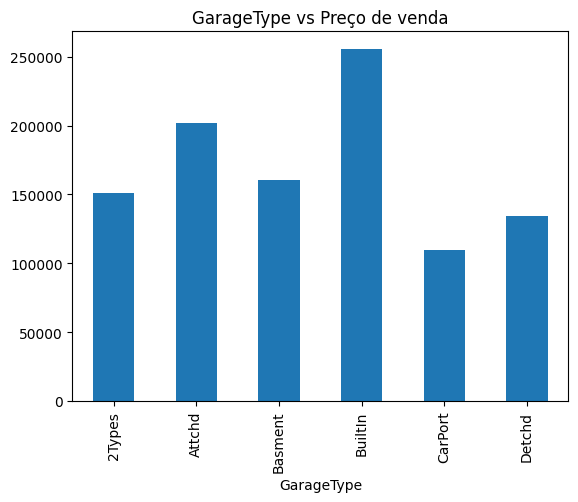

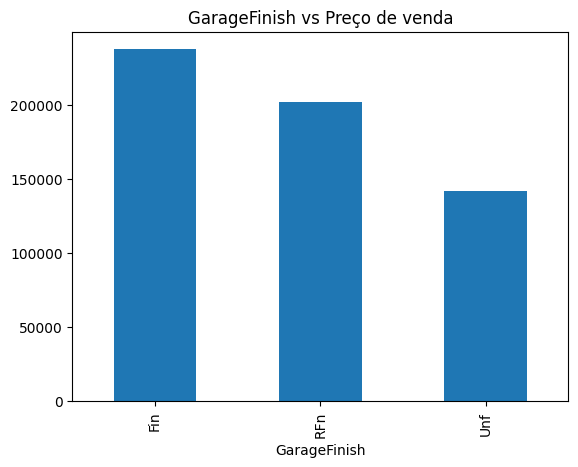

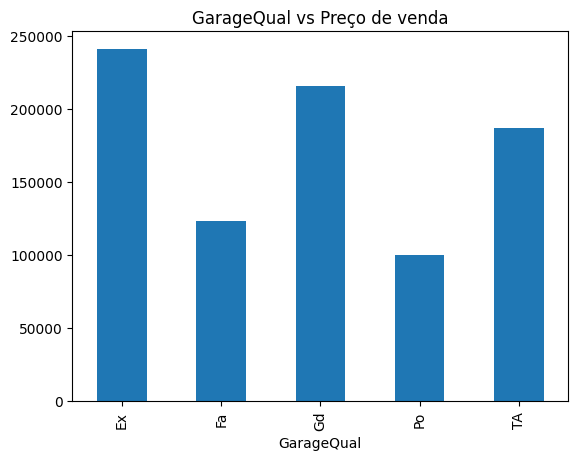

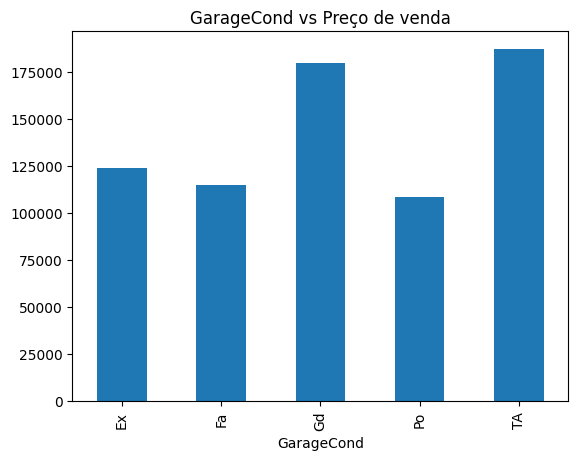

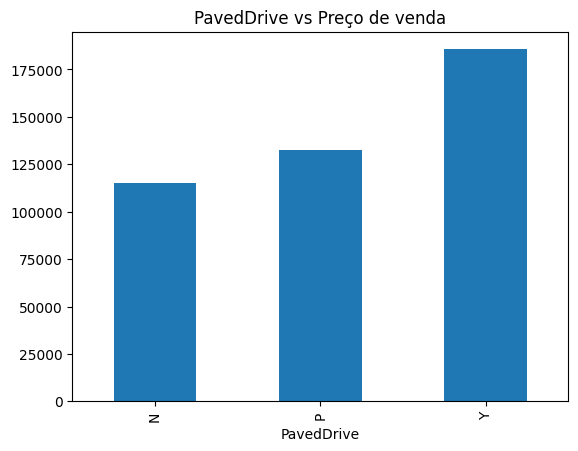

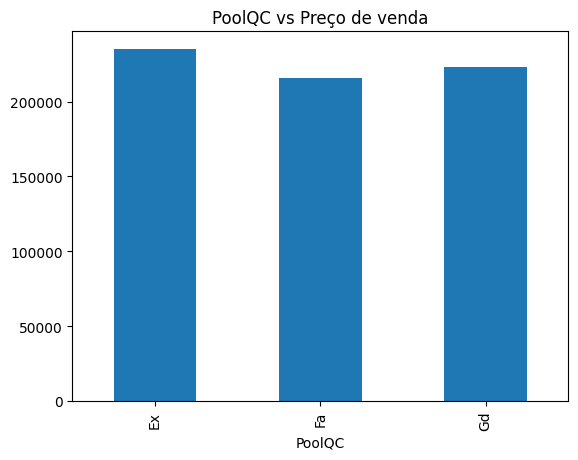

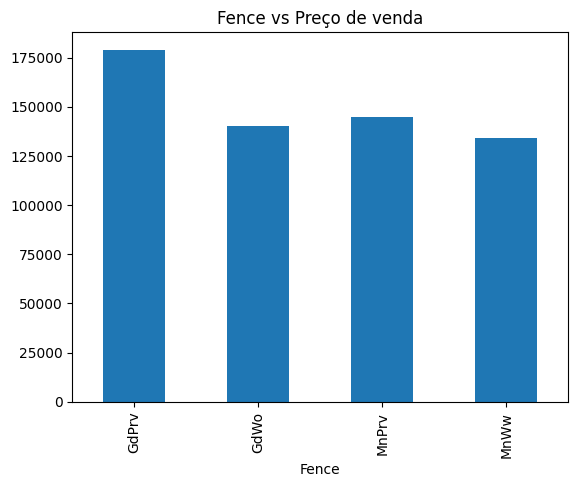

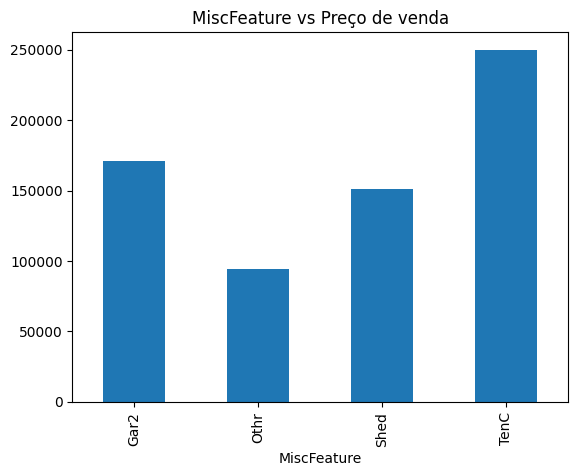

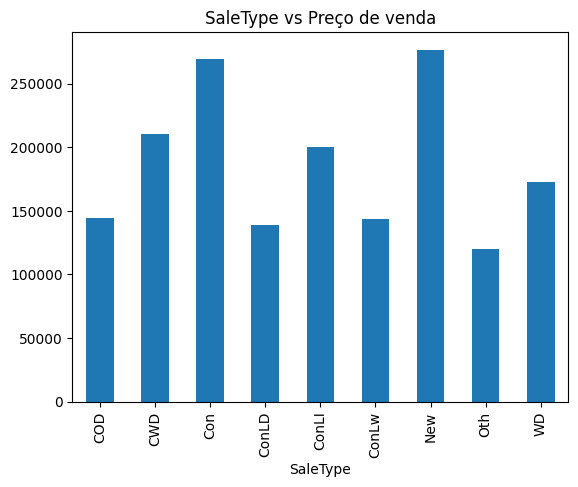

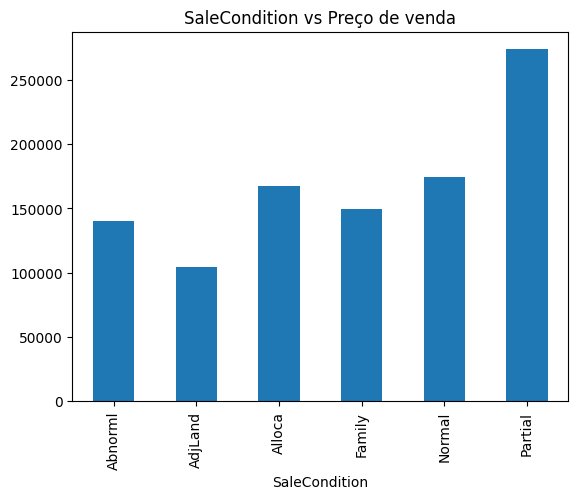

In [12]:
for feature in variaveis_categoricas:
    train.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature + ' vs Preço de venda')
    plt.show()

Plotando a distribuição de frequência do Preço de venda

<ipython-input-13-fc78773f3e1b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y1, kde=False, fit=stats.norm)
<ipython-input-13-fc78773f3e1b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y1, kde=False, fit=stats.lognorm)


<Axes: title={'center': 'Log '}, xlabel='SalePrice'>

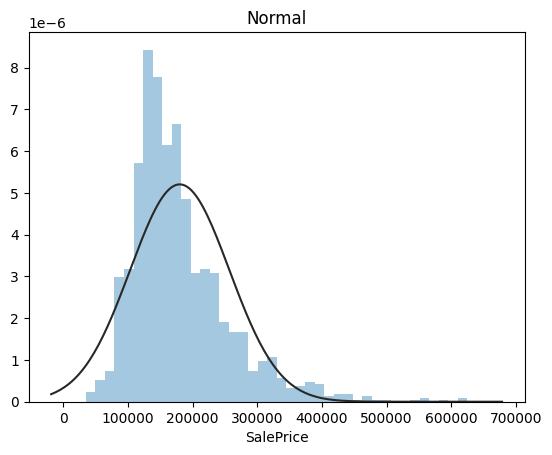

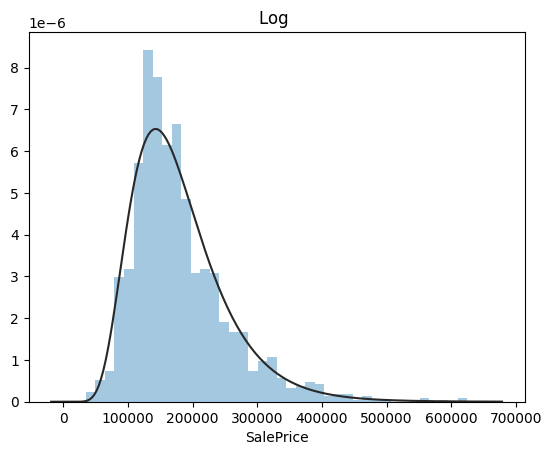

In [13]:
y1 = train['SalePrice']
plt.figure(2); plt.title('Normal')
sns.distplot(y1, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log ')
sns.distplot(y1, kde=False, fit=stats.lognorm)

Vou usar a variavel aplicada a função log pois apresentou um comportamento mais semelhante a curva normal.

In [86]:
y = np.log(train["SalePrice"])
y_normal = train.SalePrice

Correlação entre as variaveis

<ipython-input-15-4ac207f40509>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = train.corr()


<Axes: >

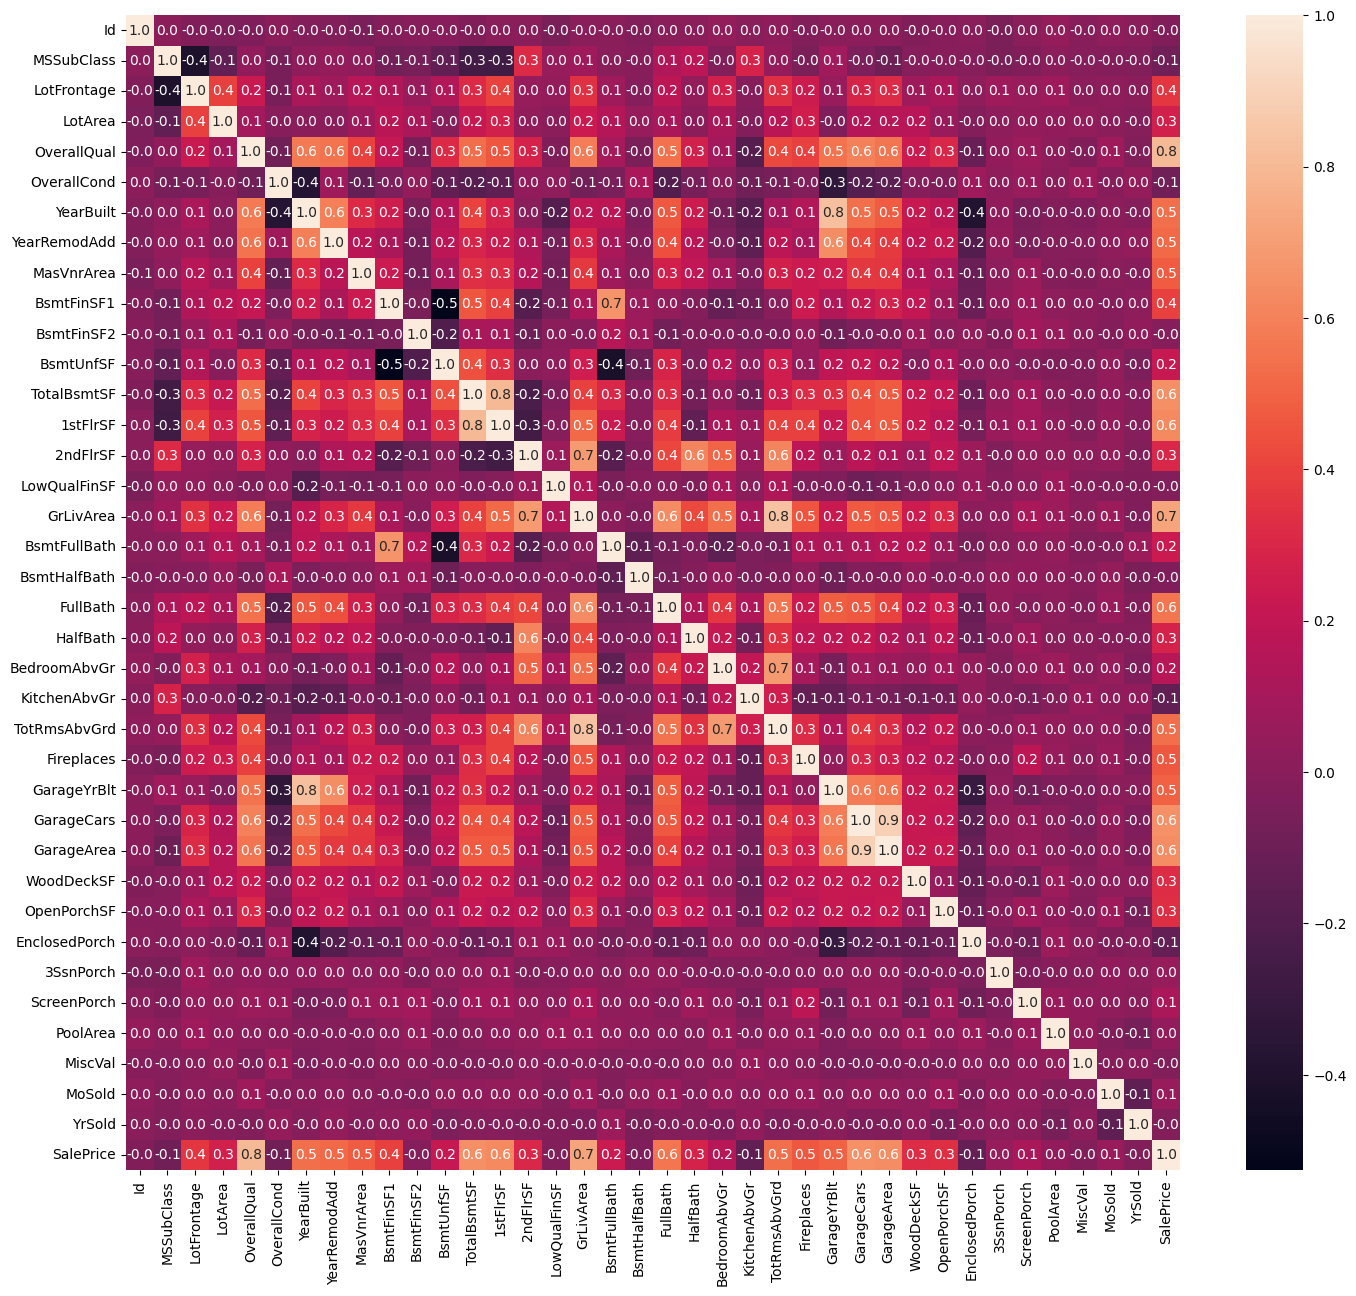

In [15]:
matriz_correlacao = train.corr()

plt.figure(figsize = (17, 15))

sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

Verificando correlação entre variaveis

In [16]:
matriz_correlacao =  matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao.sum().sort_values(ascending=False)

Id               1.0
WoodDeckSF       1.0
BedroomAbvGr     1.0
KitchenAbvGr     1.0
TotRmsAbvGrd     1.0
Fireplaces       1.0
GarageYrBlt      1.0
GarageCars       1.0
GarageArea       1.0
OpenPorchSF      1.0
MSSubClass       1.0
EnclosedPorch    1.0
3SsnPorch        1.0
ScreenPorch      1.0
PoolArea         1.0
MiscVal          1.0
MoSold           1.0
YrSold           1.0
HalfBath         1.0
FullBath         1.0
BsmtHalfBath     1.0
BsmtFullBath     1.0
LotFrontage      1.0
LotArea          1.0
OverallQual      1.0
OverallCond      1.0
YearBuilt        1.0
YearRemodAdd     1.0
MasVnrArea       1.0
BsmtFinSF1       1.0
BsmtFinSF2       1.0
BsmtUnfSF        1.0
TotalBsmtSF      1.0
1stFlrSF         1.0
2ndFlrSF         1.0
LowQualFinSF     1.0
GrLivArea        1.0
SalePrice        1.0
dtype: float64

Tratando os dados faltantes

In [17]:
features_nonefill = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]
#Substituindo NA por "None"
dados[features_nonefill] = dados[features_nonefill].fillna("None")

In [18]:
features_modefill = ["MasVnrType", "MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "KitchenQual", "Functional"]
#Substituindo NA por "Mode"(valor mais frequente)
dados[features_modefill] = dados.groupby("Neighborhood")[features_modefill].transform(lambda x:x.fillna(x.mode()[0]))

In [19]:
features_medianfill = ["GarageArea", "LotFrontage"]
#filling NA por "median"
dados[features_medianfill] = dados.groupby("Neighborhood")[features_medianfill].transform(lambda x: x.fillna(x.median())) #grouping by Neighborhood

In [20]:
features_zerofill = ["GarageYrBlt", "MasVnrArea", "BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GarageCars"]
#Substituindo NA por 0
dados[features_zerofill] = dados[features_zerofill].fillna(0)

In [21]:
pd.set_option('display.max_columns', 100)

In [22]:
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


In [23]:
dados.info()
#verifcando se há algum dado vazio

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2915 non-null   int64  
 1   MSSubClass     2915 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2915 non-null   float64
 4   LotArea        2915 non-null   int64  
 5   Street         2915 non-null   object 
 6   Alley          2915 non-null   object 
 7   LotShape       2915 non-null   object 
 8   LandContour    2915 non-null   object 
 9   Utilities      2915 non-null   object 
 10  LotConfig      2915 non-null   object 
 11  LandSlope      2915 non-null   object 
 12  Neighborhood   2915 non-null   object 
 13  Condition1     2915 non-null   object 
 14  Condition2     2915 non-null   object 
 15  BldgType       2915 non-null   object 
 16  HouseStyle     2915 non-null   object 
 17  OverallQual    2915 non-null   int64  
 18  OverallC

Criando novas colunas

In [24]:
dados["TotalArea"] = dados["GrLivArea"] + dados["TotalBsmtSF"]
dados["TotalBaths"] = dados["FullBath"] + dados["BsmtFullBath"] + 0.5*(dados["HalfBath"]+dados["BsmtHalfBath"])
dados["TotalPorch"] = dados["OpenPorchSF"] + dados["EnclosedPorch"] + dados["3SsnPorch"] + dados["ScreenPorch"]
dados['Pool'] = dados['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
dados['2ndFloor'] = dados['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
dados['Garage'] = dados['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
dados['Bsmt'] = dados['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
dados['Fireplace'] = dados['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
dados['Porch'] = dados['TotalPorch'].apply(lambda x: 1 if x > 0 else 0)

In [25]:
dados.shape

(2915, 89)

In [26]:
dados.drop(columns=['GrLivArea','TotalBsmtSF','FullBath','HalfBath','BsmtHalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','2ndFlrSF','GarageCars','TotalBsmtSF','Fireplaces','TotalPorch'],inplace = True)

In [27]:
dados.shape

(2915, 75)

In [28]:
dados[["MSSubClass", "YrSold"]] = dados[["MSSubClass", "YrSold"]].astype("category")

In [29]:
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea,TotalBaths,Pool,2ndFloor,Garage,Bsmt,Fireplace,Porch
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,GasA,Ex,Y,SBrkr,856,0,1.0,3,1,Gd,8,Typ,None,Attchd,2003.0,RFn,548.0,TA,TA,Y,0,None,None,None,0,2,2008,WD,Normal,2566.0,3.5,0,1,1,1,0,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,GasA,Ex,Y,SBrkr,1262,0,0.0,3,1,TA,6,Typ,TA,Attchd,1976.0,RFn,460.0,TA,TA,Y,298,None,None,None,0,5,2007,WD,Normal,2524.0,2.5,0,0,1,1,1,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,GasA,Ex,Y,SBrkr,920,0,1.0,3,1,Gd,6,Typ,TA,Attchd,2001.0,RFn,608.0,TA,TA,Y,0,None,None,None,0,9,2008,WD,Normal,2706.0,3.5,0,1,1,1,1,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,GasA,Gd,Y,SBrkr,961,0,1.0,3,1,Gd,7,Typ,Gd,Detchd,1998.0,Unf,642.0,TA,TA,Y,0,None,None,None,0,2,2006,WD,Abnorml,2473.0,2.0,0,1,1,1,1,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,GasA,Ex,Y,SBrkr,1145,0,1.0,4,1,Gd,9,Typ,TA,Attchd,2000.0,RFn,836.0,TA,TA,Y,192,None,None,None,0,12,2008,WD,Normal,3343.0,3.5,0,1,1,1,1,1


Retirando as colunas categóricas que possuem pouca relaçâo com o preço dos imóveis. Essa mudança é motivada pela análise grafica vista anteriormente.

In [30]:
dados.drop(columns=['SaleType','GarageCond','GarageType','Functional','BsmtFinType2','BsmtFinType1','BsmtQual',
                    'Foundation','MasVnrType','Exterior2nd','Exterior1st','RoofStyle','BldgType','Condition1',
                    'LandSlope','LotConfig','LotShape'],inplace=True)

In [31]:
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,Neighborhood,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,TotalArea,TotalBaths,Pool,2ndFloor,Garage,Bsmt,Fireplace,Porch
0,1,60,RL,65.0,8450,Pave,None,Lvl,AllPub,CollgCr,Norm,2Story,7,5,2003,2003,CompShg,196.0,Gd,TA,TA,No,706.0,0.0,150.0,GasA,Ex,Y,SBrkr,856,0,1.0,3,1,Gd,8,None,2003.0,RFn,548.0,TA,Y,0,None,None,None,0,2,2008,Normal,2566.0,3.5,0,1,1,1,0,1
1,2,20,RL,80.0,9600,Pave,None,Lvl,AllPub,Veenker,Norm,1Story,6,8,1976,1976,CompShg,0.0,TA,TA,TA,Gd,978.0,0.0,284.0,GasA,Ex,Y,SBrkr,1262,0,0.0,3,1,TA,6,TA,1976.0,RFn,460.0,TA,Y,298,None,None,None,0,5,2007,Normal,2524.0,2.5,0,0,1,1,1,0
2,3,60,RL,68.0,11250,Pave,None,Lvl,AllPub,CollgCr,Norm,2Story,7,5,2001,2002,CompShg,162.0,Gd,TA,TA,Mn,486.0,0.0,434.0,GasA,Ex,Y,SBrkr,920,0,1.0,3,1,Gd,6,TA,2001.0,RFn,608.0,TA,Y,0,None,None,None,0,9,2008,Normal,2706.0,3.5,0,1,1,1,1,1
3,4,70,RL,60.0,9550,Pave,None,Lvl,AllPub,Crawfor,Norm,2Story,7,5,1915,1970,CompShg,0.0,TA,TA,Gd,No,216.0,0.0,540.0,GasA,Gd,Y,SBrkr,961,0,1.0,3,1,Gd,7,Gd,1998.0,Unf,642.0,TA,Y,0,None,None,None,0,2,2006,Abnorml,2473.0,2.0,0,1,1,1,1,1
4,5,60,RL,84.0,14260,Pave,None,Lvl,AllPub,NoRidge,Norm,2Story,8,5,2000,2000,CompShg,350.0,Gd,TA,TA,Av,655.0,0.0,490.0,GasA,Ex,Y,SBrkr,1145,0,1.0,4,1,Gd,9,TA,2000.0,RFn,836.0,TA,Y,192,None,None,None,0,12,2008,Normal,3343.0,3.5,0,1,1,1,1,1


In [32]:
variaveis_categoricas=[]
for feature in dados.columns:
    if dados[feature].dtype=='O'and feature!= 'SalePrice':
        variaveis_categoricas.append(feature)

for feature in variaveis_categoricas:
  print(dados[feature].value_counts())

RL         2262
RM          463
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2903
Grvl      12
Name: Street, dtype: int64
None    2717
Grvl     120
Pave      78
Name: Alley, dtype: int64
Lvl    2620
HLS     120
Bnk     115
Low      60
Name: LandContour, dtype: int64
AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
Norm      2886
Feedr       13
Artery       5
PosA         4
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
1Story    1471
2Story     868
1.5Fin     314
SLvl       128
SFoyer      83

Substituindo os valores em texto por números para aplicar no modelo

In [33]:
dados['SaleCondition'] = dados['SaleCondition'].map(lambda x: 1 if x == 'Normal' else 0)
dados['Fence'] = dados['Fence'].map(lambda x: 0 if x == 'None' else 1)
dados['MiscFeature'] = dados['MiscFeature'].map(lambda x: 0 if x == 'None' else 1)
dados['PoolQC'] = dados['PoolQC'].map(lambda x: 0 if x == 'None' else 1)
dados['PavedDrive'] = dados['PavedDrive'].map(lambda x: 1 if x == 'Y' else 0)
dados['GarageQual'] = dados['GarageQual'].replace({'Ex': 5, 'Po': 4, 'Fa': 3, 'TA': 2, 'Gd': 1, 'Other': 0})
dados['GarageFinish'] = dados['GarageFinish'].replace({'Ufn': 3, 'RFn': 2, 'Fin': 1, 'Other': 0})
dados['FireplaceQu'] = dados['FireplaceQu'].replace({'Ex': 5, 'Po': 4, 'Fa': 3, 'TA': 2, 'Gd': 1, 'Other': 0})
dados['KitchenQual'] = dados['KitchenQual'].replace({'Ex': 5, 'Fa': 3, 'TA': 2, 'Gd': 1})
dados['Electrical'] = dados['Electrical'].map(lambda x: 1 if x == 'SBrkr' else 0)
dados['CentralAir'] = dados['CentralAir'].map(lambda x: 1 if x == 'Y' else 0)
dados['HeatingQC'] = dados['HeatingQC'].replace({'Ex': 5, 'Po': 4, 'Fa': 3, 'TA': 2, 'Gd': 1, 'Other': 0})
dados['Heating'] = dados['Heating'].map(lambda x: 1 if x == 'GasA' else 0)
dados['BsmtExposure'] = dados['BsmtExposure'].map(lambda x: 1 if x == 'No' else 0)
dados['BsmtCond'] = dados['BsmtCond'].replace({'Po': 4, 'Fa': 3, 'TA': 2, 'Gd': 1, 'Other': 0})
dados['ExterCond'] = dados['ExterCond'].replace({'Ex': 5, 'Po': 4, 'Fa': 3, 'TA': 2, 'Gd': 1, 'Other': 0})
dados['ExterQual'] = dados['ExterQual'].replace({'Ex': 5, 'Fa': 3, 'TA': 2, 'Gd': 1, 'Other': 0})
dados['RoofMatl'] = dados['RoofMatl'].map(lambda x: 1 if x == 'CompShg' else 0)
dados['HouseStyle'] = dados['HouseStyle'].replace({'1Story': 5, '2Story': 4, '1.5Fin': 3, 'SLvl': 2, 'SFoyer': 1, 'Other': 0})
dados['Condition2'] = dados['Condition2'].map(lambda x: 1 if x == 'Norm' else 0)
dados['Neighborhood'] = dados['Neighborhood'].replace({'NAmes': 25, 'Blueste': 24, 'NPkVill': 23, 'Veenker': 22, 'Blmngtn': 21,
                                                       'BrDale': 20, 'MeadowV':19,'ClearCr':18,'SWISU':17,'StoneBr':16,'NoRidge':15,'Timber':14,
                                                       'IDOTRR':13,'BrkSide':12,'Mitchel':11,'SawyerW':10,'NWAmes':9,'Sawyer':8,
                                                       'Crawfor':7,'Gilbert':6,'Somerst':5,'NridgHt':4,'Edwards':3,'OldTown':2,'CollgCr':1})
dados['Utilities'] = dados['Utilities'].map(lambda x: 1 if x == 'AllPub' else 0)
dados['LandContour'] = dados['LandContour'].replace({'Lvl': 4, 'HLS': 3, 'Bnk': 2, 'Low': 1})
dados['Alley'] = dados['Alley'].replace({'Pave': 2, 'Grvl': 1, 'None': 0})
dados['Street'] = dados['Street'].map(lambda x: 1 if x == 'Pave' else 0)
dados['MSZoning'] = dados['MSZoning'].replace({'C (all)': 4, 'RH': 3, 'FV': 2, 'RM': 1, 'RL': 0})

In [34]:
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,Neighborhood,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,TotalArea,TotalBaths,Pool,2ndFloor,Garage,Bsmt,Fireplace,Porch
0,1,60,0,65.0,8450,1,0,4,1,1,1,4,7,5,2003,2003,1,196.0,1,2,2,1,706.0,0.0,150.0,1,5,1,1,856,0,1.0,3,1,1,8,None,2003.0,2,548.0,2,1,0,0,0,0,0,2,2008,1,2566.0,3.5,0,1,1,1,0,1
1,2,20,0,80.0,9600,1,0,4,1,22,1,5,6,8,1976,1976,1,0.0,2,2,2,0,978.0,0.0,284.0,1,5,1,1,1262,0,0.0,3,1,2,6,2,1976.0,2,460.0,2,1,298,0,0,0,0,5,2007,1,2524.0,2.5,0,0,1,1,1,0
2,3,60,0,68.0,11250,1,0,4,1,1,1,4,7,5,2001,2002,1,162.0,1,2,2,0,486.0,0.0,434.0,1,5,1,1,920,0,1.0,3,1,1,6,2,2001.0,2,608.0,2,1,0,0,0,0,0,9,2008,1,2706.0,3.5,0,1,1,1,1,1
3,4,70,0,60.0,9550,1,0,4,1,7,1,4,7,5,1915,1970,1,0.0,2,2,1,1,216.0,0.0,540.0,1,1,1,1,961,0,1.0,3,1,1,7,1,1998.0,Unf,642.0,2,1,0,0,0,0,0,2,2006,0,2473.0,2.0,0,1,1,1,1,1
4,5,60,0,84.0,14260,1,0,4,1,15,1,4,8,5,2000,2000,1,350.0,1,2,2,0,655.0,0.0,490.0,1,5,1,1,1145,0,1.0,4,1,1,9,2,2000.0,2,836.0,2,1,192,0,0,0,0,12,2008,1,3343.0,3.5,0,1,1,1,1,1


In [35]:
variaveis_categoricas=[]
for feature in dados.columns:
    if dados[feature].dtype=='O'and feature!= 'SalePrice':
        variaveis_categoricas.append(feature)

for feature in variaveis_categoricas:
  print(dados[feature].value_counts())

5         1471
4          868
3          314
2          128
1           83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64
2       2602
1        122
3        104
None      82
4          5
Name: BsmtCond, dtype: int64
None    1420
1        742
2        591
3         74
4         46
5         42
Name: FireplaceQu, dtype: int64
Unf     1230
2        811
1        715
None     159
Name: GarageFinish, dtype: int64
2       2600
None     159
3        124
1         24
4          5
5          3
Name: GarageQual, dtype: int64


In [36]:
dados['GarageQual'] = dados['GarageQual'].replace({'None':0})
dados['GarageFinish'] = dados['GarageFinish'].replace({'None':0,'Unf':3})
dados['FireplaceQu'] = dados['FireplaceQu'].replace({'None':0})
dados['BsmtCond'] = dados['BsmtCond'].replace({'None':0})
dados['GarageFinish'] = dados['GarageFinish'].replace({'2.5Unf':6,'1.5Unf':7,'2.5Fin':8})

In [37]:
variaveis_categoricas=[]
for feature in dados.columns:
    if dados[feature].dtype=='O'and feature!= 'SalePrice':
        variaveis_categoricas.append(feature)
print(variaveis_categoricas)
for feature in variaveis_categoricas:
  print(dados[feature].value_counts())

['HouseStyle']
5         1471
4          868
3          314
2          128
1           83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64


In [38]:
dados['HouseStyle'] = dados['HouseStyle'].replace({'2.5Unf':6,'1.5Unf':7,'2.5Fin':8})

In [39]:
variaveis_categoricas=[]
for feature in dados.columns:
    if dados[feature].dtype=='O'and feature!= 'SalePrice':
        variaveis_categoricas.append(feature)
print(variaveis_categoricas)
for feature in variaveis_categoricas:
  print(dados[feature].value_counts())

[]


In [40]:
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,Neighborhood,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,TotalArea,TotalBaths,Pool,2ndFloor,Garage,Bsmt,Fireplace,Porch
0,1,60,0,65.0,8450,1,0,4,1,1,1,4,7,5,2003,2003,1,196.0,1,2,2,1,706.0,0.0,150.0,1,5,1,1,856,0,1.0,3,1,1,8,0,2003.0,2,548.0,2,1,0,0,0,0,0,2,2008,1,2566.0,3.5,0,1,1,1,0,1
1,2,20,0,80.0,9600,1,0,4,1,22,1,5,6,8,1976,1976,1,0.0,2,2,2,0,978.0,0.0,284.0,1,5,1,1,1262,0,0.0,3,1,2,6,2,1976.0,2,460.0,2,1,298,0,0,0,0,5,2007,1,2524.0,2.5,0,0,1,1,1,0
2,3,60,0,68.0,11250,1,0,4,1,1,1,4,7,5,2001,2002,1,162.0,1,2,2,0,486.0,0.0,434.0,1,5,1,1,920,0,1.0,3,1,1,6,2,2001.0,2,608.0,2,1,0,0,0,0,0,9,2008,1,2706.0,3.5,0,1,1,1,1,1
3,4,70,0,60.0,9550,1,0,4,1,7,1,4,7,5,1915,1970,1,0.0,2,2,1,1,216.0,0.0,540.0,1,1,1,1,961,0,1.0,3,1,1,7,1,1998.0,3,642.0,2,1,0,0,0,0,0,2,2006,0,2473.0,2.0,0,1,1,1,1,1
4,5,60,0,84.0,14260,1,0,4,1,15,1,4,8,5,2000,2000,1,350.0,1,2,2,0,655.0,0.0,490.0,1,5,1,1,1145,0,1.0,4,1,1,9,2,2000.0,2,836.0,2,1,192,0,0,0,0,12,2008,1,3343.0,3.5,0,1,1,1,1,1


Retirando as variaveis com datas

In [41]:
dados.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [42]:
X_train = dados.loc[train.index] #Data-set de treino
X_test = dados.loc[test.index] #Data-set de teste

Desconcatenando o Dataset

In [44]:
num_linhas_dados1 = len(train)

X_train = dados.iloc[:num_linhas_dados1]
X_test = dados.iloc[num_linhas_dados1:]

In [45]:
X_train.shape

(1456, 54)

In [46]:
train.shape

(1456, 81)

In [47]:
y = pd.DataFrame(y)


Criando e testando os modelos

In [54]:
import random
def classificador_1(valores):
    SEED = 123143
    random.seed(SEED)
    classificador = RandomForestRegressor()
    classificador.fit(valores, y)
    y_previsto = classificador.predict(valores)
    print("Resultado da Regressao (score) %.2f%%" % (classificador.score(X_train,y)* 100))
    erro = mean_squared_error(y, y_previsto)
    print("Resultado da Regressão (erro): %.3f" % erro)
    resultado = classificador.predict(X_test)
    test['SalePrice'] = np.exp(resultado)


In [55]:
def classificador_2(valores):
    SEED = 123143
    random.seed(SEED)
    classificador = LinearRegression()
    classificador.fit(valores, y)
    y_previsto = classificador.predict(valores)
    print("Resultado da Regressao (score) %.2f%%" % (classificador.score(X_train,y)* 100))
    erro = mean_squared_error(y, y_previsto)
    print("Resultado da Regressão (erro): %.3f" % erro)
    resultado = classificador.predict(X_test)
    test['SalePrice'] = np.exp(resultado)


O modelo com melhor desempenho foi o RandomForestRegressor de acordo com as métricas de score e erro.

In [50]:
classificador_1(X_train)

<ipython-input-48-6f6b0d35abab>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classificador.fit(valores, y)


Resultado da Regressao (score) 98.33%
Resultado da Regressão (erro): 0.003


In [56]:
classificador_2(X_train)

Resultado da Regressao (score) 89.93%
Resultado da Regressão (erro): 0.016


Aplicando o RFE para selecionar as 45 melhores colunas

In [101]:
classificador = RandomForestRegressor()
classificador.fit(X_train, y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 45, step = 1)
selecionador_rfe.fit(X_train, y)

X_train_rfe = selecionador_rfe.transform(X_train)
X_test_rfe = selecionador_rfe.transform(X_test)

classificador.fit(X_train_rfe, y)

y_previsto = classificador.predict(X_train_rfe)

erro = mean_squared_error(y, y_previsto)
print("Resultado da Regressão (erro): %.3f" % erro)
resultado = classificador.predict(X_test_rfe)
test['SalePrice'] = np.exp(resultado)

Resultado da Regressão (erro): 0.003


In [96]:
selecionador_rfe.feature_names_in_

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LandContour', 'Utilities', 'Neighborhood', 'Condition2',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofMatl',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'MoSold', 'SaleCondition', 'TotalArea',
       'TotalBaths', 'Pool', '2ndFloor', 'Garage', 'Bsmt', 'Fireplace',
       'Porch'], dtype=object)

Fazendo a submissão para postar no kaglle

In [103]:
submissao = test[['Id','SalePrice']]
submissao.to_csv('submissao_rfe_45.csv',index=False)